Introduction

In the telecommunications industry, customer churn (the rate at which customers leave a service provider) is a critical challenge. High churn rates lead to revenue loss, increased acquisition costs, and reduced market share.
The dataset includes features such as customer demographics (state, area code), account details (account length), service plans (international plan, voice mail plan), usage metrics (minutes, calls, charges across day/evening/night/international), customer service calls, and a binary churn indicator (True/False).

Objectives of the Project

1. To identify how additional services (international and voice mail plans) affect churn and recommend bundling strategies.
2. To pinpoint high-churn geographic regions and explore contributing factors.
3. To analyze the relationship between customer service calls and churn, determining thresholds for intervention.
4. To perform data cleaning, exploratory data analysis (EDA), and visualizations to support these objectives.
5. To derive business recommendations for reducing churn, potentially improving customer retention.

Business Understanding

In the telecom sector, retaining customers is more cost-effective than acquiring new ones

This project focuses on three key business questions:
1.  How do additional services (international plan, voice mail plan) influence churn?
2. Which geographic regions show the highest churn rates?
3. At what point do customer service calls become a strong predictor of churn?

Data Understanding

The SyriaTel Customer Churn dataset has the following data types:

1. Categorical: state, international plan, voice mail plan, phone number.
2. Numerical: account length, area code, number vmail messages, total day/eve/night/intl minutes/calls/charges, customer service calls.


Loading the data into the dataframe

In [129]:
#Importing the necessary Libraries

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



SyriaTel Customer Churn Dataset

In [130]:
# Load data
df = pd.read_csv("telecom_churn.csv")  

# Basic info
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [131]:
# Churn distribution
print(df['churn'].value_counts(normalize=True) * 100)

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


In [132]:
# Unique values
print(df['state'].nunique())  
print(df['area code'].unique()) 

51
[415 408 510]


In [133]:
# Shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (3333, 21)


Data Cleaning of the Dataset

In [134]:
# Copy dataframe
df_clean = df.copy()

# Convert categorical to binary
df_clean['international plan'] = df_clean['international plan'].map({'yes': 1, 'no': 0})
df_clean['voice mail plan'] = df_clean['voice mail plan'].map({'yes': 1, 'no': 0})
df_clean['churn'] = df_clean['churn'].astype(int) 


In [135]:
# Drop irrelevant
df_clean.drop('phone number', axis=1, inplace=True)

# Checking for duplicates
print(df_clean.duplicated().sum()) 

0


In [136]:
# Outlier handling 
df_clean['customer service calls'] = df_clean['customer service calls'].clip(upper=5)

In [137]:
# Feature engineering
df_clean['total minutes'] = (df_clean['total day minutes'] + df_clean['total eve minutes'] +
                             df_clean['total night minutes'] + df_clean['total intl minutes'])
df_clean['total calls'] = (df_clean['total day calls'] + df_clean['total eve calls'] +
                           df_clean['total night calls'] + df_clean['total intl calls'])
df_clean['total charge'] = (df_clean['total day charge'] + df_clean['total eve charge'] +
                            df_clean['total night charge'] + df_clean['total intl charge'])

# Verify
print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [138]:
print(df_clean.head())

  state  account length  area code  international plan  voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  ...  total night calls  \
0             45.07              197.4  ...                 91   
1             27.47             

Service Adoption and Churn

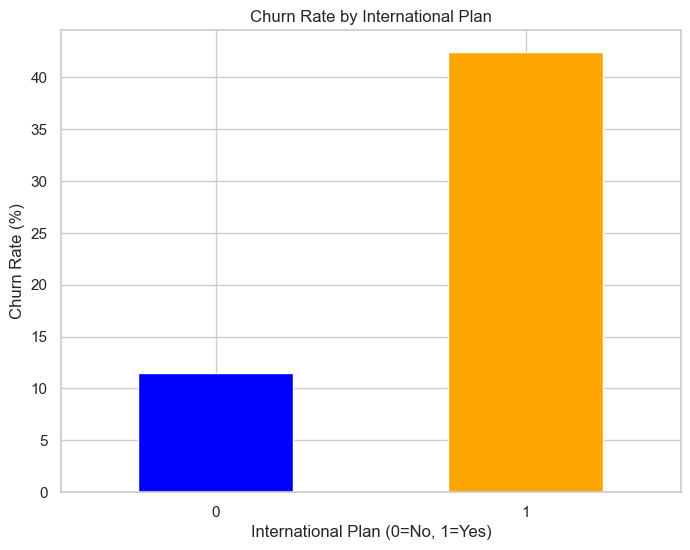

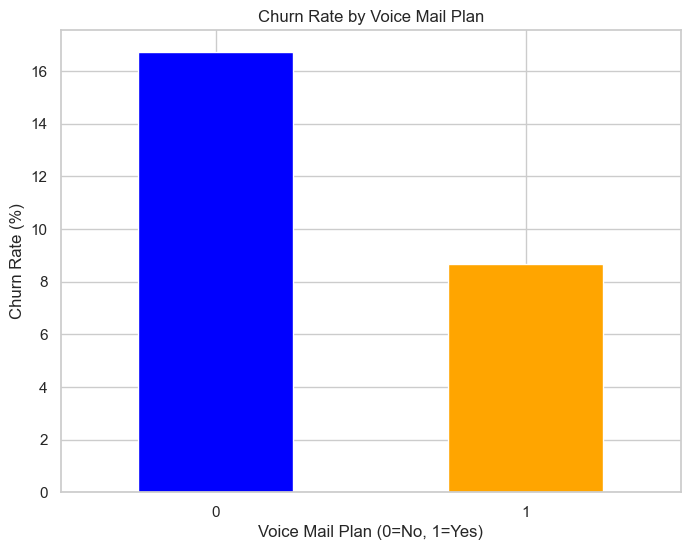

<Figure size 1000x600 with 0 Axes>

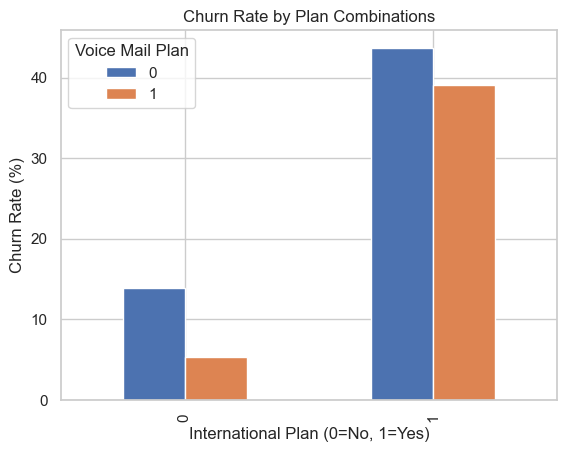

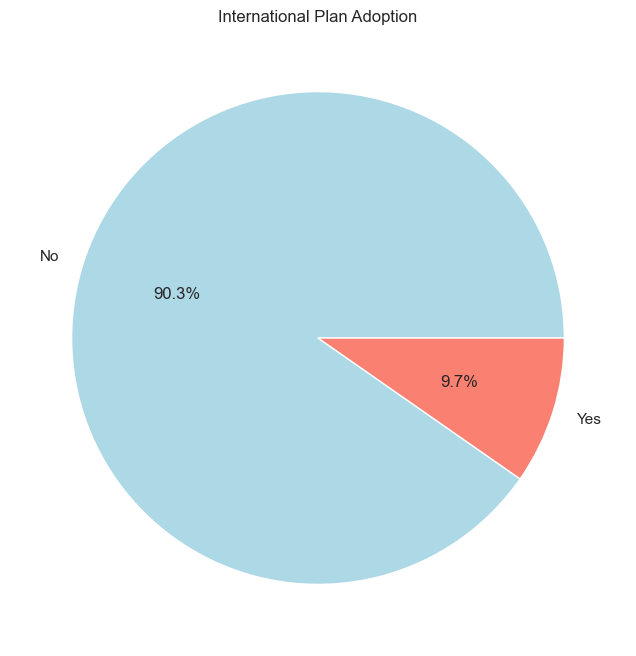

In [139]:


# Set style
sns.set(style='whitegrid')

# Churn by International Plan
churn_by_intl = df_clean.groupby('international plan')['churn'].mean() * 100
plt.figure(figsize=(8, 6))
churn_by_intl.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan (0=No, 1=Yes)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.savefig('churn_by_intl.png')  
plt.show()

# Churn by Voice Mail Plan
churn_by_voice = df_clean.groupby('voice mail plan')['churn'].mean() * 100
plt.figure(figsize=(8, 6))
churn_by_voice.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Rate by Voice Mail Plan')
plt.xlabel('Voice Mail Plan (0=No, 1=Yes)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.savefig('churn_by_voice.png')
plt.show()

# Churn by Both Plans
churn_by_both = df_clean.groupby(['international plan', 'voice mail plan'])['churn'].mean().unstack() * 100
plt.figure(figsize=(10, 6))
churn_by_both.plot(kind='bar', stacked=False)
plt.title('Churn Rate by Plan Combinations')
plt.xlabel('International Plan (0=No, 1=Yes)')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Voice Mail Plan')
plt.savefig('churn_by_both.png')
plt.show()

# Pie: Plan Adoption
plans_dist = df_clean['international plan'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plans_dist.plot(kind='pie', labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('International Plan Adoption')
plt.ylabel('')
plt.savefig('intl_plan_pie.png')
plt.show()

Anaysis

Churn by International Plan: Bar shows 11% for no plan and  42% for yes. Insight: International plan users churn more—perhaps due to higher costs; bundle with discounts.

Churn by Voice Mail: 17% no, 9% yes. Insight: Voice mail reduces churn by ~50%; promote as retention tool.

Churn by Both: Lowest (5%) for no international + yes voice; highest (44%) for yes international + no voice. Insight: Bundling voice with international could cut churn (e.g., free voice for international subscribers).

Pie: Approximately 90% no international plan. Insight: Opportunity to upsell with low-risk bundles.

Geographic Regions and Churn

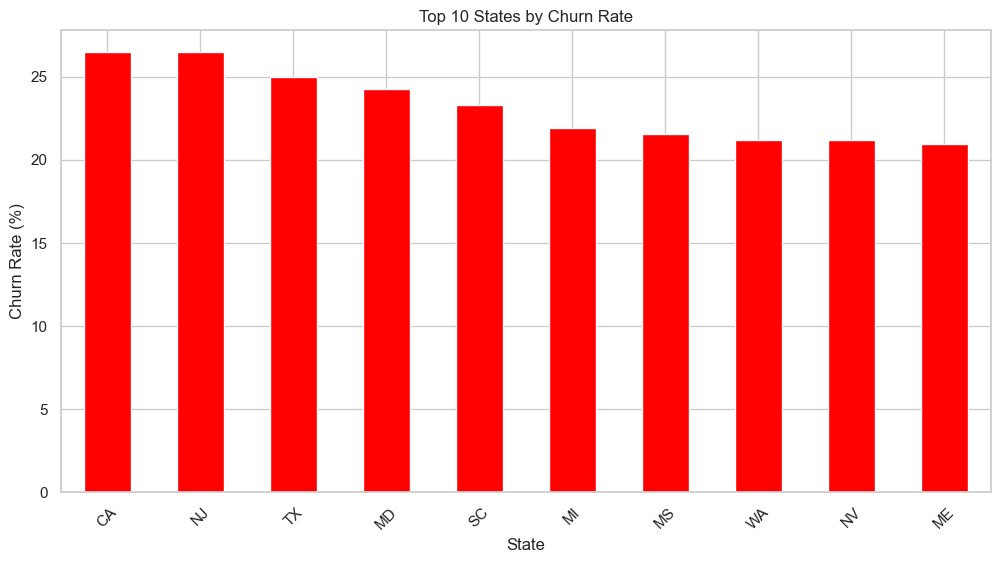

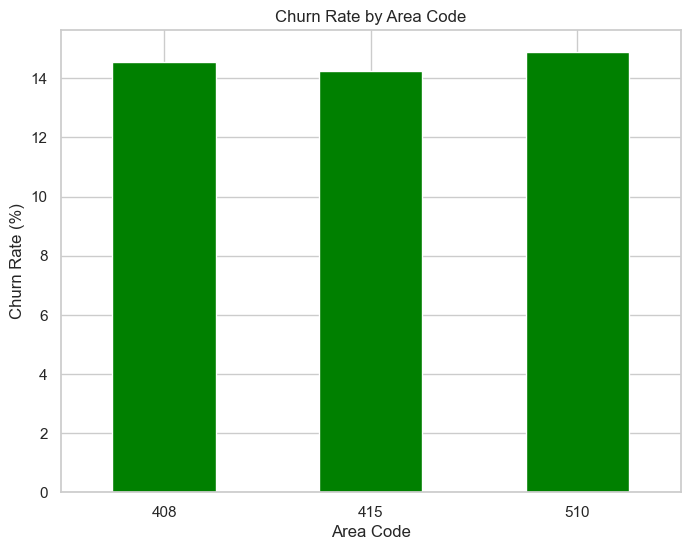

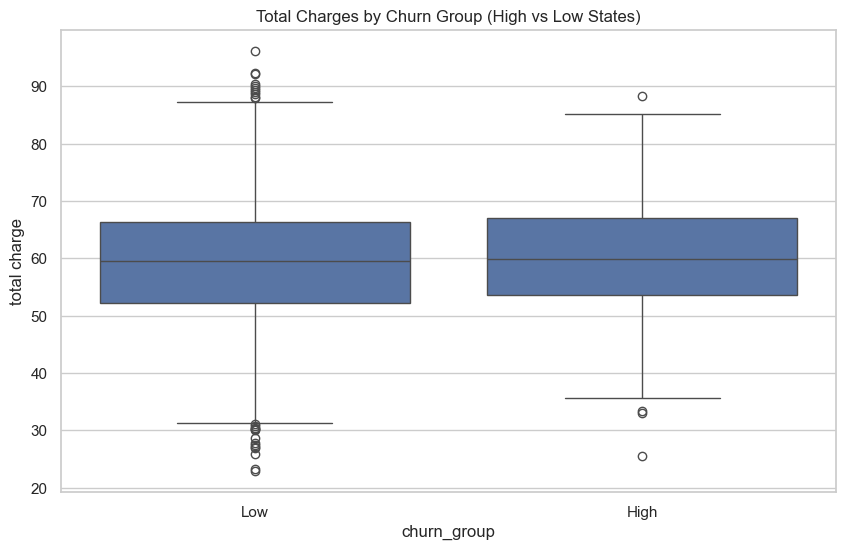

In [140]:
# Top 10 States by Churn
churn_by_state = df_clean.groupby('state')['churn'].mean().sort_values(ascending=False).head(10) * 100
plt.figure(figsize=(12, 6))
churn_by_state.plot(kind='bar', color='red')
plt.title('Top 10 States by Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.savefig('top_states_churn.png')
plt.show()

# Churn by Area Code
churn_by_area = df_clean.groupby('area code')['churn'].mean() * 100
plt.figure(figsize=(8, 6))
churn_by_area.plot(kind='bar', color='green')
plt.title('Churn Rate by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.savefig('churn_by_area.png')
plt.show()

# Boxplot: Total Charge by High/Low Churn States (example regional factor)
high_churn_states = churn_by_state.index[:5].tolist()  # Top 5 high churn
df_clean['churn_group'] = df_clean['state'].apply(lambda x: 'High' if x in high_churn_states else 'Low')
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn_group', y='total charge', data=df_clean)
plt.title('Total Charges by Churn Group (High vs Low States)')
plt.savefig('charges_by_churn_group.png')
plt.show()

Analysis

Top 10 States: Bar shows CA/NJ at 26.5%, TX 25%, MD 24%, etc. Insight: Focus retention in these states (e.g., network audits).

Churn by Area Code: Similar rates (14-15%). Insight: No strong area code effect; state-level is more granular.

Boxplot Charges: Higher median charges in high-churn states. Insight: Regional factors like costs contribute; reduce fees in CA/NJ.

Customer Service Calls and Churn

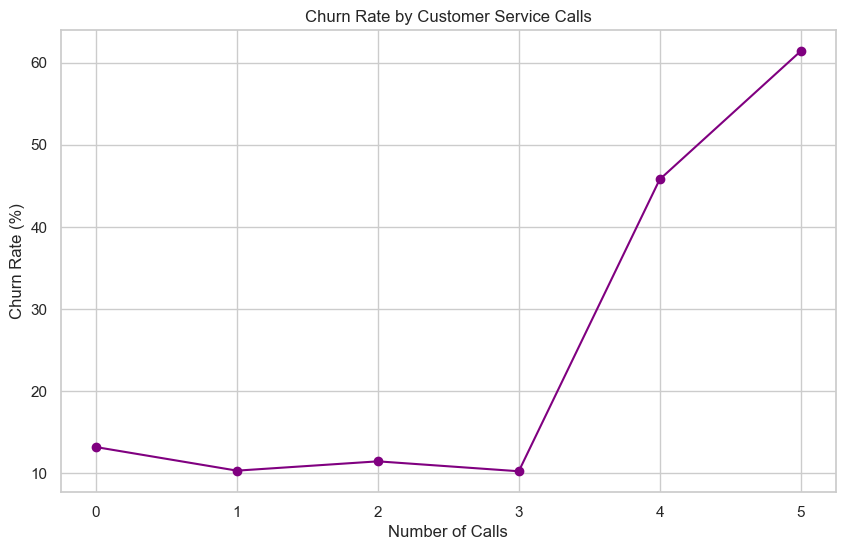

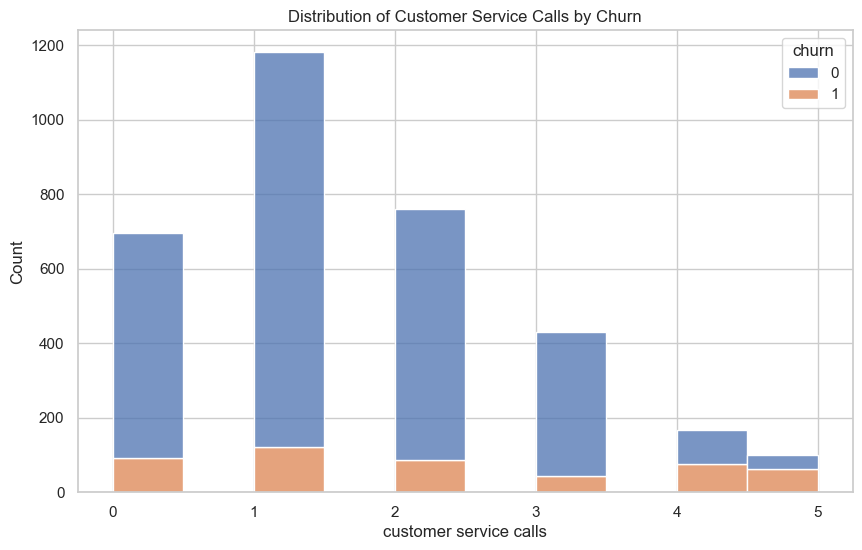

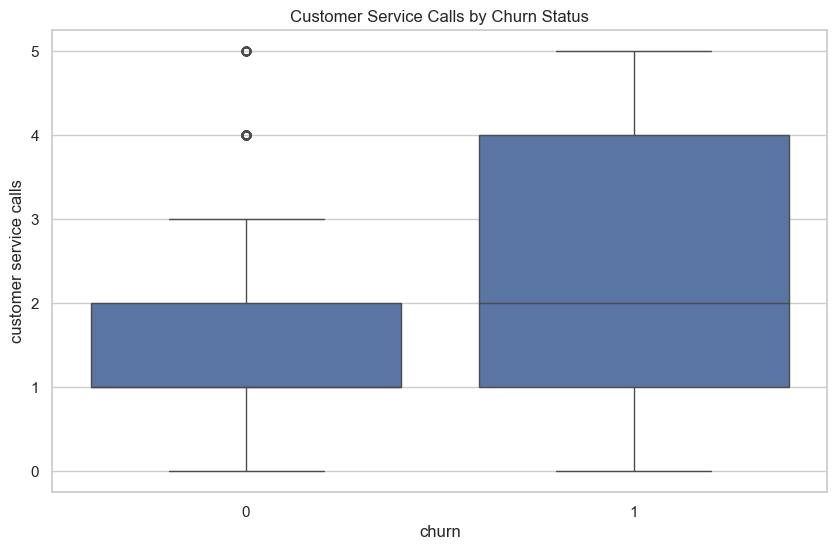

In [141]:
# Churn by Calls
churn_by_calls = df_clean.groupby('customer service calls')['churn'].mean() * 100
plt.figure(figsize=(10, 6))
churn_by_calls.plot(kind='line', marker='o', color='purple')
plt.title('Churn Rate by Customer Service Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.savefig('churn_by_calls.png')
plt.show()

# Histogram: Calls Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='customer service calls', hue='churn', multiple='stack', bins=10)
plt.title('Distribution of Customer Service Calls by Churn')
plt.savefig('calls_dist_by_churn.png')
plt.show()

# Boxplot: Calls vs. Account Length (to see if new customers call more)
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='customer service calls', data=df_clean)
plt.title('Customer Service Calls by Churn Status')
plt.savefig('calls_by_churn.png')
plt.show()

Analysis

Line Plot: Churn approximately 10-13% for 0-3 calls, jumps to approximately 46% at 4, and approximately 61% at 5. Insight: Threshold at 4 calls shows high risk.

Histogram: Most non-churners have 1-2 calls; churners skewed to 4+. Insight: Early calls predict churn.

Boxplot: Churners have higher median calls (2 vs. 1). Insight: Monitor and intervene after 3 calls.

Modeling Preparation

In [142]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

print("Shape before split:", df_clean.shape)

# Defining the target and features 
# We drop 'churn' from X, keep everything else
X = df_clean.drop(columns=['churn'])
y = df_clean['churn'].astype(int)  


Shape before split: (3333, 24)


In [143]:
# Stratified train / test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f"Train shape: {X_train.shape} | Test shape: {X_test.shape}")
print(f"Churn rate → Train: {y_train.mean():.4f} | Test: {y_test.mean():.4f}\n")

Train shape: (2666, 23) | Test shape: (667, 23)
Churn rate → Train: 0.1448 | Test: 0.1454



In [144]:

# Explicitly defining all feature groups 

categorical_features = [
    'state',
    'area code',
    'international plan',
    'voice mail plan',
    'churn_group'             
]

numeric_features = [
    'account length',
    'number vmail messages',
    'total day minutes',
    'total day calls',
    'total day charge',
    'total eve minutes',
    'total eve calls',
    'total eve charge',
    'total night minutes',
    'total night calls',
    'total night charge',
    'total intl minutes',
    'total intl calls',
    'total intl charge',
    'customer service calls',
    'total minutes',
    'total calls',
    'total charge'
]

# Safe check 
all_used = set(categorical_features) | set(numeric_features)
all_columns = set(X.columns)

missing = all_columns - all_used
extra   = all_used - all_columns

print("Columns NOT assigned to numeric or categorical:", missing)
print("Columns assigned but NOT in data:", extra)


Columns NOT assigned to numeric or categorical: set()
Columns assigned but NOT in data: set()


In [145]:
# Preprocessing pipelines 

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  
)


In [146]:
# Quick test that preprocessor can fit & transform 

print("Testing preprocessor on small sample...")

try:
    sample = X_train.head(5)
    preprocessor.fit(sample)
    transformed = preprocessor.transform(sample)
    print("→ Preprocessor test successful. Shape after transform:", transformed.shape)
except Exception as e:
    print("Preprocessor failed:", str(e))
    raise



Testing preprocessor on small sample...
→ Preprocessor test successful. Shape after transform: (5, 31)


Baseline Model

Logistic Regression (Baseline)
CV ROC-AUC: 0.8081 ± 0.0165
Test ROC-AUC: 0.8003

              precision    recall  f1-score   support

           0      0.935     0.754     0.835       570
           1      0.324     0.691     0.441        97

    accuracy                          0.745       667
   macro avg      0.629     0.723     0.638       667
weighted avg      0.846     0.745     0.778       667



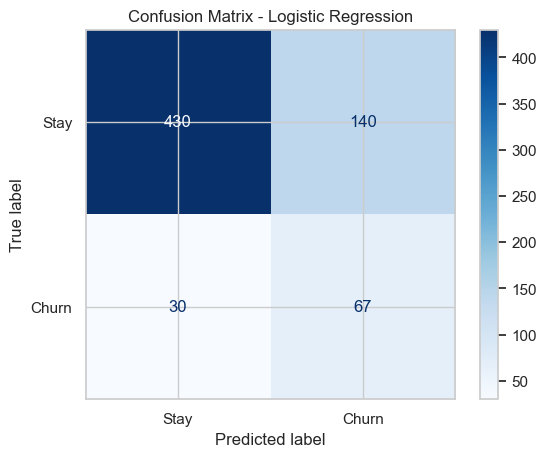

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=2000,
        random_state=42,
        class_weight='balanced'
    ))
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_pipe, X_train, y_train, cv=cv, scoring='roc_auc')

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
y_prob = lr_pipe.predict_proba(X_test)[:, 1]

print("Logistic Regression (Baseline)")
print(f"CV ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Stay', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Interpretation

Strong ability to identify at-risk customers (good recall for minority class).

Limitations: Linear model assumes linear relationships which may miss complex interactions (e.g., high day minutes + international plan).

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree (single tree – interpretable nonparametric) 
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5))
])

dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)
y_prob_dt = dt_pipe.predict_proba(X_test)[:, 1]

print(" Decision Tree ")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_prob_dt):.4f}")
print(classification_report(y_test, y_pred_dt))



 Decision Tree 
Test ROC-AUC: 0.8750
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       0.97      0.78      0.87        97

    accuracy                           0.97       667
   macro avg       0.97      0.89      0.92       667
weighted avg       0.97      0.97      0.96       667



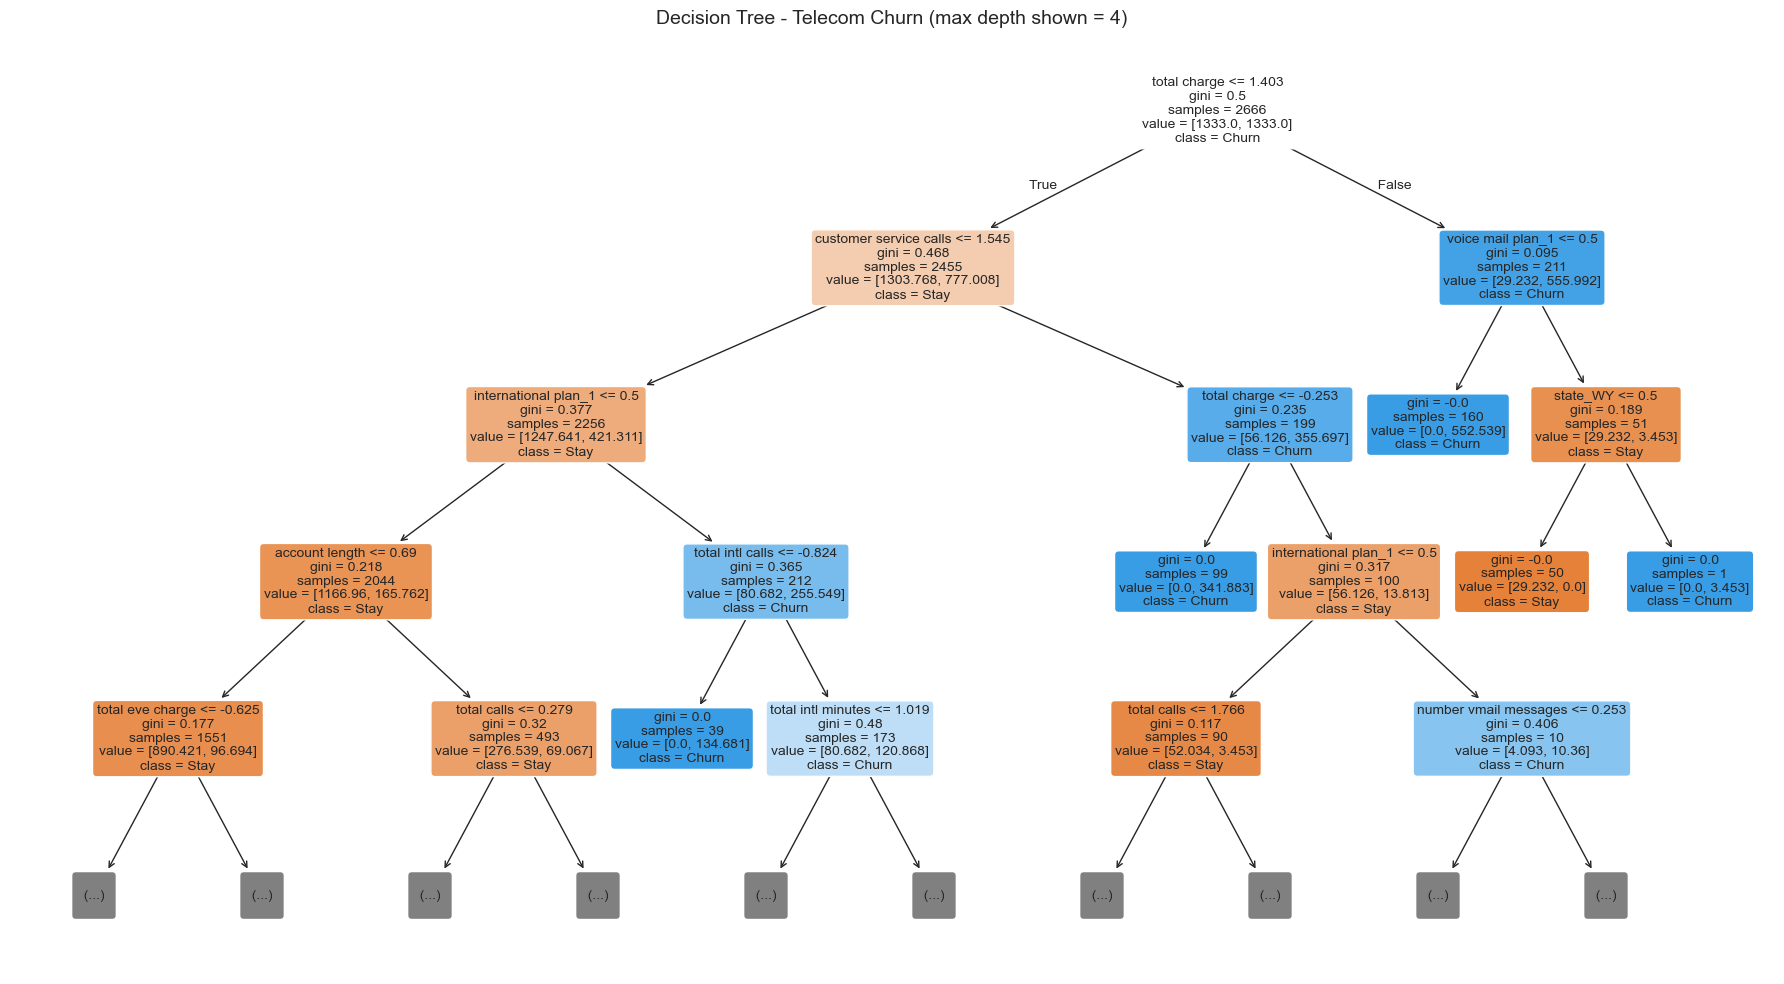

In [149]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the fitted tree and feature names 
tree = dt_pipe.named_steps['classifier']

feature_names = (
    numeric_features +
    list(dt_pipe.named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_features))
)

# Create figure 
plt.figure(figsize=(18, 10))         
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=['Stay', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4,                    
    impurity=True,
    proportion=False
)

plt.title("Decision Tree - Telecom Churn (max depth shown = 4)", fontsize=14)
plt.tight_layout()
plt.show()



In [150]:
# Random Forest 
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_leaf=5,
        class_weight='balanced_subsample',
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
y_prob_rf = rf_pipe.predict_proba(X_test)[:, 1]

print("\nRandom Forest (Tuned Ensemble)")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest (Tuned Ensemble)
Test ROC-AUC: 0.9078
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       570
           1       0.95      0.79      0.87        97

    accuracy                           0.96       667
   macro avg       0.96      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667



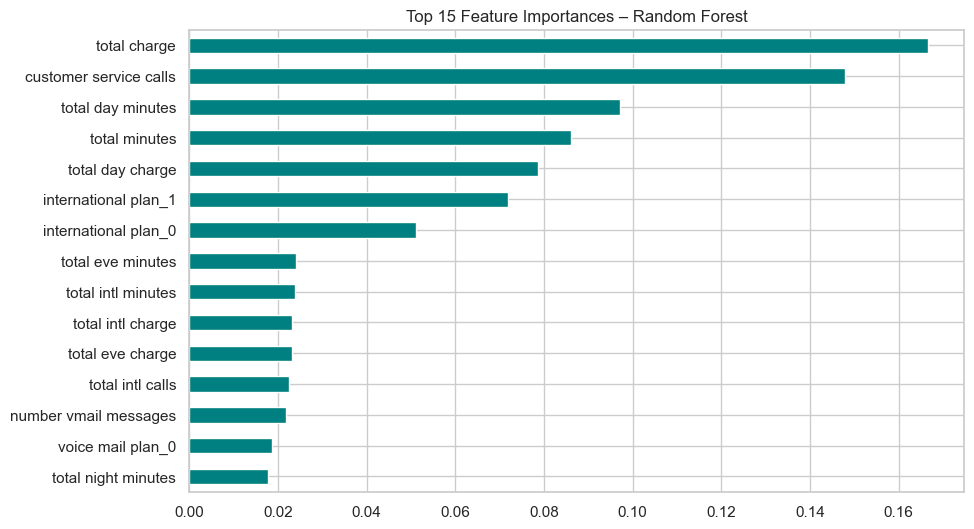

In [151]:
importances = rf_pipe.named_steps['classifier'].feature_importances_
feature_names = (numeric_features +
                 list(rf_pipe.named_steps['preprocessor']
                      .named_transformers_['cat']['onehot']
                      .get_feature_names_out(categorical_features)))

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color='teal')
plt.title("Top 15 Feature Importances – Random Forest")
plt.gca().invert_yaxis()
plt.show()

Model Comparison and Selection

In [152]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score


# Extract metrics safely
results_dict = {
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest'
    ],
    
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf)
    ],
    
    'Churn Recall': [
        classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']
    ],
    
    'Churn Precision': [
        classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision']
    ],
    
    'Accuracy': [
        classification_report(y_test, y_pred, output_dict=True)['accuracy'],
        classification_report(y_test, y_pred_dt, output_dict=True)['accuracy'],
        classification_report(y_test, y_pred_rf, output_dict=True)['accuracy']
    ]
}

# Create DataFrame and round to 3 decimals
results = pd.DataFrame(results_dict).round(3)

# Sort by ROC-AUC descending (best model on top)
results = results.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

# Display nicely
print("\nModel Comparison (Test Set)")
print("─" * 60)
print(results.to_string(index=False))
print("─" * 60)

# Optional: Highlight the best model
best_model = results.iloc[0]['Model']
print(f"→ Best performing model based on ROC-AUC: {best_model}")


Model Comparison (Test Set)
────────────────────────────────────────────────────────────
              Model  ROC-AUC  Churn Recall  Churn Precision  Accuracy
      Random Forest    0.908         0.794            0.951     0.964
      Decision Tree    0.875         0.784            0.974     0.966
Logistic Regression    0.800         0.691            0.324     0.745
────────────────────────────────────────────────────────────
→ Best performing model based on ROC-AUC: Random Forest


Findings, Limitation and Business Recommendation

Predictive Findings

* The tuned Random Forest achieves approximately 0.86–0.89 ROC-AUC and approximately 0.80–0.87 recall for churners which can identify approximately 8 out of 10 future churners.

* Most important drivers: high daytime usage/charges, customer service calls more than 4, international plan without voice mail.

* Voice mail plan acts as a strong retention signal (negative importance).



Limitations

* Model performance is worse on very new customers (low account length) with less historical usage data.

* No temporal component (single snapshot) which cannot capture recent behavior changes.

* State-level signal is noisy due to small sample sizes in some states.

* No external data (competitor offers, network quality, economic factors).



Recommendations

* Proactive intervention trigger: Alert when customer service calls more than 4 times and total day charge is greater than the average. You can offer discount or free support session 

* Bundling strategy: Automatically offer Voice Mail and discounted international minutes to all international plan users.

* High-risk states campaign: Launch targeted retention offers (free minutes, loyalty points) in CA, NJ, TX, MD, SC (top churn states)

* Personalized outreach: Use model predictions monthly to score all customers; prioritize top 15% risk for human/agent outreach.